In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("../data/processed/cleaned_ecommerce_sales_data.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate monthly sales
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum().reset_index()
monthly_sales.head()

,Order Date,Sales
0,2022-01-31,341544
1,2022-02-28,208775
2,2022-03-31,294660
3,2022-04-30,230624
4,2022-05-31,314295


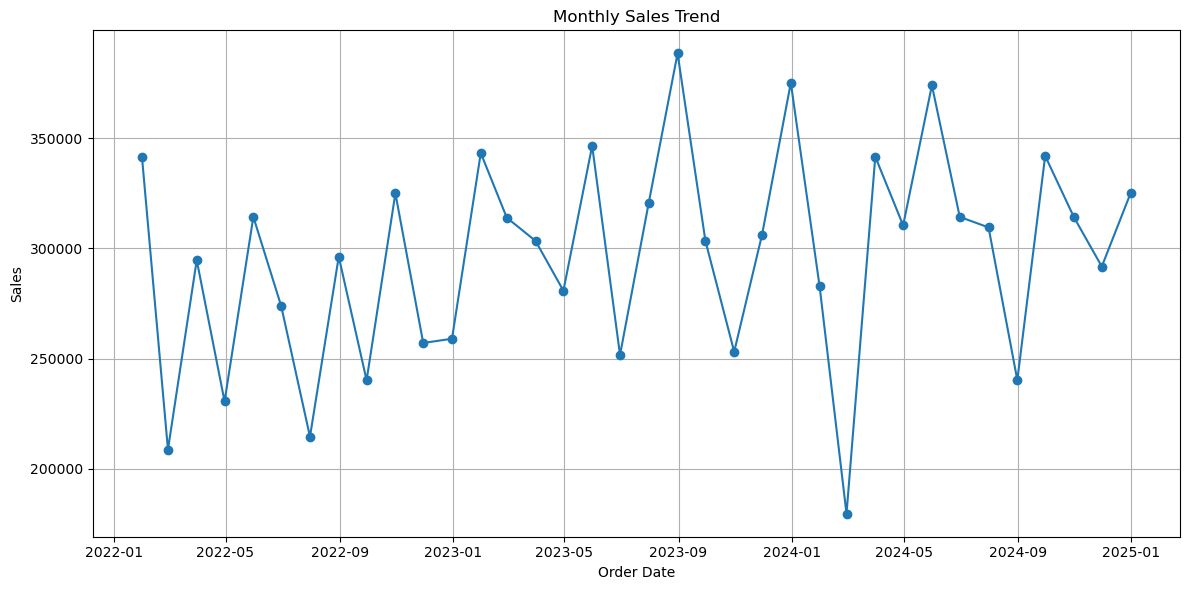

In [3]:
# Monthly Sales Trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Data for Linear Regression Forecast
from sklearn.linear_model import LinearRegression
import numpy as np

# Create numeric time index
monthly_sales['Month_Index']=np.arange(len(monthly_sales))

# Features and Target
X=monthly_sales[['Month_Index']]
y=monthly_sales['Sales']

# Train linear regression model
model=LinearRegression()
model.fit(X, y)

# Predict sales
monthly_sales['Sales_Predicted']=model.predict(X)

monthly_sales.head()

,Order Date,Sales,Month_Index,Sales_Predicted
0,2022-01-31,341544,0,274241.021021
1,2022-02-28,208775,1,275503.249979
2,2022-03-31,294660,2,276765.478936
3,2022-04-30,230624,3,278027.707894
4,2022-05-31,314295,4,279289.936851


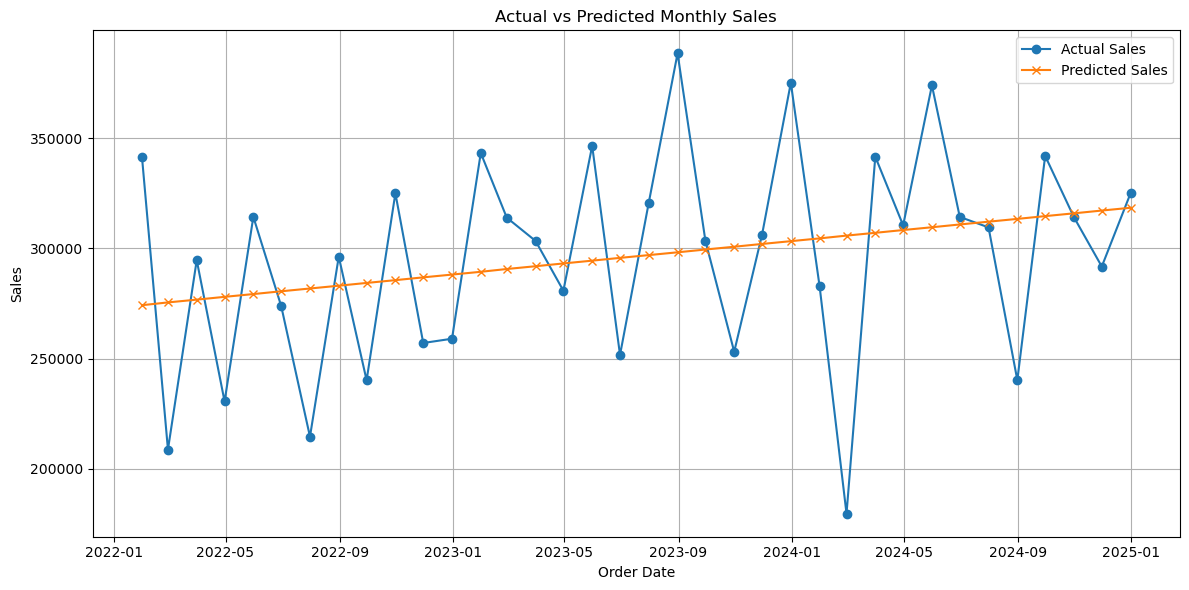

In [5]:
# Plot Actual vs Predicted Sales

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', label='Actual Sales')
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales_Predicted'], marker='x', label='Predicted Sales')
plt.title("Actual vs Predicted Monthly Sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Forecast next 6 months
future_index=np.arange(len(monthly_sales), len(monthly_sales)+6).reshape(-1,1)
future_dates=pd.date_range(start=monthly_sales['Order Date'].max() + pd.Timedelta(days=1), periods=6, freq='ME')

future_sales=model.predict(future_index)

forecast_df=pd.DataFrame({
    'Order Date': future_dates,
    'Predicted_Sales': future_sales
})

forecast_df

C:\Users\MOHAMMED\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Order Date,Predicted_Sales
0,2025-01-31,319681.263492
1,2025-02-28,320943.492450
2,2025-03-31,322205.721407
3,2025-04-30,323467.950365
4,2025-05-31,324730.179322
5,2025-06-30,325992.408280


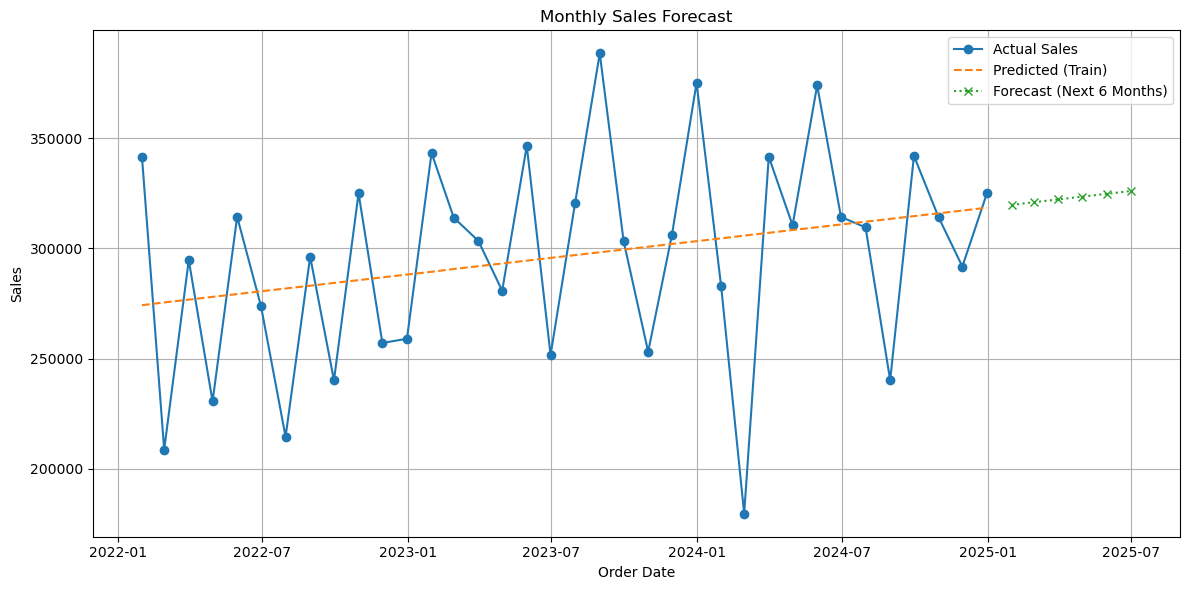

In [9]:
plt.figure(figsize=(12,6))

# Historical actual sales
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Sales'],
    marker='o',
    label='Actual Sales'
)

# Historical predicted sales
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Sales_Predicted'],
    linestyle='--',
    label='Predicted (Train)'
)

# Future forecast
plt.plot(
    forecast_df['Order Date'],
    forecast_df['Predicted_Sales'],
    marker='x',
    linestyle=':',
    label='Forecast (Next 6 Months)'
)

plt.title("Monthly Sales Forecast")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()